# Mine
# Inefficient (because the itertools.permutations() takes more time)

# (1) findwords(word)

In [ ]:
import itertools

def findwords(word):
    
    wordset = set(open('words4k.txt').read().upper().split())
    
    result = set()
    
    for i in range(len(word)+1):
        
        #print (list(map("".join, itertools.permutations(word,i))))        
        
        for j in list(map("".join, itertools.permutations(word,i))):
            
            if j in wordset:     
                
                result.add(j)
    
    return result

print (findwords("RHNA"))
print (findwords("TOR"))

# (2) my findwords(word)  +  instructor's anagrams(phrase)
# complicated

In [ ]:
# This homework deals with anagrams. An anagram is a rearrangement of the letters in a word to form one or more new words.
#
# Your job is to write a function anagrams(), which takes as input a phrase and an optional argument, shortest, which is an 
# integer that specifies the shortest acceptable word. Your function should return a set of all the possible combinations of 
# anagrams.
#
# Your function should not return every permutation of a multi word anagram: only the permutation where the words are in 
# alphabetical order. For example, for the input string 'ANAGRAMS' the set that your function returns should include 
# 'AN ARM SAG', but should NOT include 'ARM SAG AN', or 'SAG AN ARM', etc...

import itertools

def anagrams(phrase, shortest=2):
    """Return a set of phrases with words from WORDS that form anagram of phrase. Spaces can be anywhere in phrase or anagram. 
    All words have length >= shortest. Phrases in answer must have words in lexicographic order (not all permutations)."""

    return find_anagrams(phrase.replace(" ", ""), "", shortest)

def find_anagrams(letters, previous_word, shortest):
    "Using letters, form anagrams using words >= previous_word and longer than shortest."

    results = set()
    
    for w in findwords(letters):
        
        if len(w) >= shortest and w > previous_word:                  # w > previous_word: 讓anagrams是依照alphabetical order
                                                                      # Ex: 是'COT RHO'，而不是'RHO COT'
                                                                      #但我覺得，應該是都要有，這才叫anagrams
            
            remainder = removed(letters, w)
            
            if remainder:
                
                for rest in find_anagrams(remainder, w, shortest):
                    
                    results.add(w + " " + rest)
                    
            else:
                
                results.add(w)
                
    return results

def removed(letters, remove):
    "Return a str of letters, but with each letter in remove removed once."

    for L in remove:
        
        letters = letters.replace(L, '', 1)
        
    return letters

Words = set(open('words4k.txt').read().upper().split())

def findwords(word):
    
    wordset = Words
    
    result = set()
    
    for i in range(len(word)+1):
        
        for j in list(map("".join, itertools.permutations(word,i))):
            
            if j in wordset:     
                
                result.add(j)
    
    return result

#print (findwords('TORCHWOOD'))

#print (anagrams('TORCHWOOD'))

#print (findwords('TOR'))

#print (anagrams('TOR'))

print (anagrams('TORCHWOOD'))
print ('DOCTOR WHO' in anagrams('TORCHWOOD'))
print ('BOOK SEC TRY' in anagrams('OCTOBER SKY'))
print ('SEE THEY' in anagrams('THE EYES'))
print ('LIVES' in anagrams('ELVIS'))
print (anagrams('PYTHONIC') == set([
        'NTH PIC YO', 'NTH OY PIC', 'ON PIC THY', 'NO PIC THY', 'COY IN PHT',
        'ICY NO PHT', 'ICY ON PHT', 'ICY NTH OP', 'COP IN THY', 'HYP ON TIC',
        'CON PI THY', 'HYP NO TIC', 'COY NTH PI', 'CON HYP IT', 'COT HYP IN',
        'CON HYP TI']))

%timeit findwords('TORCHWOOD')

# (3) Description
# 沒有 "and w > previous_word" 的限制 => 所有的組合都會print

In [6]:
import itertools

def anagrams(phrase, shortest=2):

    return find_anagrams(phrase.replace(" ", ""), shortest)    #讓phrase中不含space

def find_anagrams(letters, shortest):

    results = set()
    
    for w in findwords(letters):                                #用findwords找出所有letters的prefixes
        
        if len(w) >= shortest:
            
            print ("w: ", w)
            
            remainder = removed(letters, w)                     # letters去掉 w 變成 remainder
            
            if remainder:                                       #還有remainder的情況
                
                print ("remainder: ", remainder)
                
                for rest in find_anagrams(remainder,shortest):  #將remainder代入 => 進入下一層的find_anagrams
                    
                    print ("rest: ", rest)
                    
                    results.add(w + " " + rest)                 #到此step => 就是有 w & rest => 併入 results
                    
            else:                                               #沒有remainder的情況
                
                results.add(w)                                  #這就是base case => 最底層的find_anagrams會將 w 併入 results
                
    return results                                              #然後最底層的find_anagrams會returns results => 也就是上一層的rest
                                                                #接著一直return 上去 => 最後returns results => Ex: ('OR TO', 'TO OR')

def removed(letters, remove):

    for L in remove:
        
        letters = letters.replace(L, '', 1)
        
    return letters

Words = set(open('words4k.txt').read().upper().split())

def findwords(word):
    
    wordset = Words
    
    result = set()
    
    for i in range(len(word)+1):
        
        for j in list(map("".join, itertools.permutations(word,i))):
            
            if j in wordset:     
                
                result.add(j)
    
    return result

print (anagrams('TORO'))

w:  ORT
remainder:  O
w:  ROT
remainder:  O
w:  TO
remainder:  RO
w:  OR
rest:  OR
w:  OR
remainder:  TO
w:  TO
rest:  TO
w:  OOT
remainder:  R
w:  TOO
remainder:  R
w:  TOR
remainder:  O
{'OR TO', 'TO OR'}


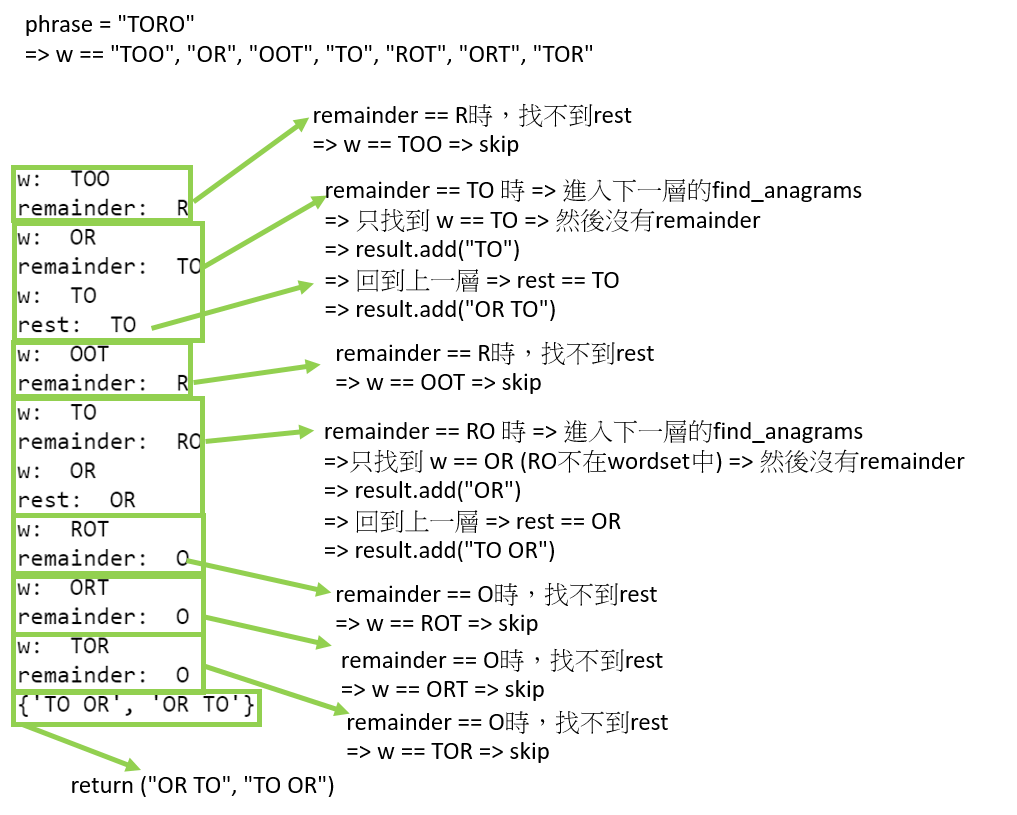

In [9]:
from IPython.display import Image

Image("Desktop\Phrase.png")

# Instructor
# Efficient, but it's very hard to understand

In [8]:
def anagrams(phrase, shortest=2):

    return find_anagrams(phrase.replace(" ", ""), "", shortest)

def find_anagrams(letters, previous_word, shortest):

    results = set()
    
    for w in find_words(letters):
        
        #print ("1st",w)
        
        if len(w) >= shortest and w > previous_word:
            
            #print ("2nd",w)
            
            remainder = removed(letters, w)
            
            #print ("1st remaninder", remainder)
            
            if remainder:
                
                for rest in find_anagrams(remainder, w, shortest):
                    
                    #print (rest)
                    #print ("3rd", w)
                    
                    results.add(w + " " + rest)
                    
            else:
                
                results.add(w)
                
    return results

def removed(letters, remove):
   
    for L in remove:
        
        letters = letters.replace(L, '', 1)
        
    return letters

def find_words(letters):
    
    return extend_prefix('', letters, set())

def extend_prefix(pre, letters, results):
    
    if pre in WORDS: 
        
        results.add(pre)
        
    if pre in PREFIXES:
        
        for L in letters:
            
            extend_prefix(pre+L, letters.replace(L, '', 1), results)
            
    return results

def prefixes(word):
    "A list of the initial sequences of a word, not including the complete word."
    
    return [word[:i] for i in range(len(word))]

def readwordlist(filename):
    "Return a pair of sets: all the words in a file, and all the prefixes. (Uppercased.)"
    
    wordset = set(open(filename).read().upper().split())
    
    prefixset = set(p for word in wordset for p in prefixes(word))
    
    return wordset, prefixset

WORDS, PREFIXES = readwordlist('words4k.txt')

print (anagrams('TORCHWOOD'))
print ('DOCTOR WHO' in anagrams('TORCHWOOD'))
print ('BOOK SEC TRY' in anagrams('OCTOBER SKY'))
print ('SEE THEY' in anagrams('THE EYES'))
print ('LIVES' in anagrams('ELVIS'))
print (anagrams('PYTHONIC') == set([
        'NTH PIC YO', 'NTH OY PIC', 'ON PIC THY', 'NO PIC THY', 'COY IN PHT',
        'ICY NO PHT', 'ICY ON PHT', 'ICY NTH OP', 'COP IN THY', 'HYP ON TIC',
        'CON PI THY', 'HYP NO TIC', 'COY NTH PI', 'CON HYP IT', 'COT HYP IN',
        'CON HYP TI']))

%timeit find_words('TORCHWOOD')

{'COD ROT WHO', 'COR HOD TOW', 'DOW HOT ROC', 'DOC ROT WHO', 'COR DOW THO', 'COW DOT RHO', 'DOW ROC THO', 'COD HOW ORT', 'DOC HOT ROW', 'COD ROW THO', 'DOC TOR WHO', 'HOW ORC TOD', 'HOD ROC TOW', 'COD RHO TOW', 'COW DOR THO', 'COR HOW TOD', 'DOC RHO TWO', 'COT HOD ROW', 'COD ORT WHO', 'COW ROD THO', 'COT HOW ROD', 'COT HO WORD', 'COW HOD TOR', 'CROWD HO TO', 'ROC TOD WHO', 'HOD ROC WOT', 'COD HOW ROT', 'HOD ORC WOT', 'DOC HOW ORT', 'HOW ROC TOD', 'HOD ROC TWO', 'DOCTOR HOW', 'DOC HOW TOR', 'COT DOW RHO', 'COD RHO TWO', 'COW HOD ORT', 'COD HOW TOR', 'DOW HOT ORC', 'DOT HOW ORC', 'COW DOR HOT', 'DOT ROC WHO', 'COT ROD WHO', 'DOW ORC THO', 'COR HOD WOT', 'COD TOR WHO', 'COD RHO WOT', 'DOC ROW THO', 'COT DOR HOW', 'COR TOD WHO', 'COW RHO TOD', 'COR DOT HOW', 'HOD ORC TOW', 'DOC RHO WOT', 'COR HOD TWO', 'COT OH WORD', 'COR DOT WHO', 'DOT HOW ROC', 'COW HOT ROD', 'DOC ORT WHO', 'DOCTOR WHO', 'COR DOW HOT', 'COT DOR WHO', 'COD HOT ROW', 'DOC RHO TOW', 'HOD ORC TWO', 'DOC HOW ROT', 'DOT ORC WH